# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Bank Customer Churn.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<b style="color:red">data description:</b><br>
<b>credit score:</b> A credit score is a number from 300 to 850 that rates a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.<br>
<b>tenure:</b> From how many years he/she is having bank acc in ABC Bank.<br>
<b>products_number:</b> Number of Product from bank.<br>
<b>credit_card:</b> Is this customer have credit card ?<br>
<b>active_member:</b> Is he/she is active Member of bank ?<br>
<b>estimated_salary:</b> Salary of Account holder<br>
<b>churn:</b> Churn Status

In [4]:
data.shape

(10000, 12)

<div class="alert alert-block alert-info">observing the data set, we noticed that if the age that customers open the bank acc affect the churn or not.<br>
we will check this after data cleaning.</div>

## Data cleaning

In [5]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<div class="alert alert-block alert-info"><b>shady columns:</b> balance, estimated_salary</div>

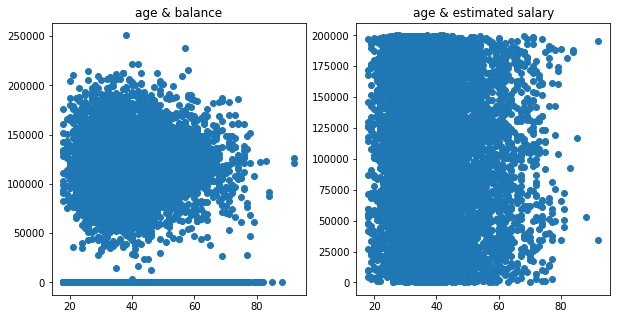

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(data.age, data.balance)
axs[0].set_title("age & balance")
axs[1].scatter(data.age, data.estimated_salary)
axs[1].set_title("age & estimated salary")

plt.show()

In [7]:
# deciding to remove the zero balances or not
zero_balances_customers = data.balance[data.balance == 0]
zero_balances_customers = zero_balances_customers.index

In [8]:
zero_balances_customers_data = pd.DataFrame(data.estimated_salary[zero_balances_customers])

In [9]:
zero_balances_customers_data.describe()

,estimated_salary
count,3617.000000
mean,98983.559549
std,57730.828955
min,90.070000
25%,49506.820000
50%,98618.790000
75%,148330.970000
max,199992.480000


<div class="alert alert-block alert-info"><b>Note: </b>Zero balances are the inactive customers ( according to that most of them have a good salaries).they are not important for this case of research.<br>we will drop them from the data.</div>

In [10]:
data.drop(zero_balances_customers, axis=0, inplace=True)

In [11]:
# Cheking customers with low salaries[drop or not]
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,6.383000e+03,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,1.569037e+07,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
std,7.192913e+04,96.934609,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600
min,1.556570e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562820e+07,584.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000
50%,1.568953e+07,652.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000
75%,1.575311e+07,718.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [12]:
low_salary_customers = data.estimated_salary[data.estimated_salary < 25000].index

In [13]:
low_salary_customers_data = pd.DataFrame(data["balance"][low_salary_customers])

In [14]:
low_salary_customers_data.describe()

,balance
count,751.000000
mean,120436.353848
std,30002.778187
min,27517.150000
25%,100023.015000
50%,119278.010000
75%,140617.570000
max,206663.750000


<div class="alert alert-block alert-info"><b>Note: </b>According to their min balance and mean balance, they wont be dropped.</div>

In [15]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,6.383000e+03,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,1.569037e+07,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
std,7.192913e+04,96.934609,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600
min,1.556570e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562820e+07,584.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000
50%,1.568953e+07,652.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000
75%,1.575311e+07,718.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       6383 non-null   int64  
 1   credit_score      6383 non-null   int64  
 2   country           6383 non-null   object 
 3   gender            6383 non-null   object 
 4   age               6383 non-null   int64  
 5   tenure            6383 non-null   int64  
 6   balance           6383 non-null   float64
 7   products_number   6383 non-null   int64  
 8   credit_card       6383 non-null   int64  
 9   active_member     6383 non-null   int64  
 10  estimated_salary  6383 non-null   float64
 11  churn             6383 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 906.3+ KB


In [17]:
data.duplicated().sum()

0

## Creating new feature

In [18]:
open_acc_age = data.age - data.tenure

In [19]:
data["open acc age"] = open_acc_age

In [20]:
# reordering columns and droping unnecessary columns
data = data[['credit_score', 'country', 'gender', 'open acc age',"age" ,'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn']]

## Encoding catorical data

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
data

,credit_score,country,gender,open acc age,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,Spain,Female,40,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,34,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,41,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,36,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,25,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,France,Female,49,53,4,88381.21,1,1,0,69384.71,1
9993,644,France,Male,21,28,7,155060.41,1,1,0,29179.52,0
9996,516,France,Male,25,35,10,57369.61,1,1,1,101699.77,0
9998,772,Germany,Male,39,42,3,75075.31,2,1,0,92888.52,1


In [23]:
# Encoding country and gender columns
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 2])], remainder="passthrough")
data = np.array(ct.fit_transform(data))

## Splitting data set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = data[:, :-1]
y = data[:, -1].reshape(-1, 1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Processing

## Training Logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
classifier = LogisticRegression(C=2, solver="newton-cg")
classifier.fit(x_train, y_train)

LogisticRegression(C=2, solver='newton-cg')

## Evaluating model

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.822239624119029

## Training KNN model & Evaluating model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
pre_result = 0
result = 0
counter = 0
for i in range(1, 20):
    knn_classifier = KNeighborsClassifier(n_neighbors=i, metric="minkowski", p=2)
    knn_classifier.fit(x_train, y_train)
    knn_y_pred = knn_classifier.predict(x_test)
    pre_result = accuracy_score(y_test, knn_y_pred)
    if pre_result > result:
        result = pre_result
        counter = i
    else:
        pass
print(f"{counter}= {result}")

17= 0.836335160532498


## Training SVM model

In [35]:
from sklearn.svm import SVC

In [36]:
classifier = SVC(kernel="rbf")
classifier.fit(x_train, y_train)

SVC()

## Evaluating

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred)

0.8551292090837901

## Training naive bayes model

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

## Evaluating model

In [41]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8230227094753328

## Training decision tree model

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
classifier = DecisionTreeClassifier(criterion="entropy", min_samples_split=6, min_samples_leaf=7,random_state=7)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=7,
                       min_samples_split=6, random_state=7)

## Evaluating

In [44]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.7838684416601409

## Training random forest model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
classifier = RandomForestClassifier(criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

## Evaluating

In [47]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8574784651527017